In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout

K.clear_session()

In [2]:
dataset='../input/smpl-data/Segmented Medicinal Leaf Images'

train_folder = os.path.join(dataset,"train")
test_folder = os.path.join(dataset,"test")
validation_folder = os.path.join(dataset,"val")

In [3]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
 
count_files(os.path.join(test_folder))


There are 26 files in Murraya Koenigii (Curry)
There are 26 files in Nyctanthes Arbor-tristis (Parijata)
There are 26 files in Plectranthus Amboinicus (Mexican Mint)
There are 26 files in Punica Granatum (Pomegranate)
There are 26 files in Ficus Religiosa (Peepal Tree)
There are 26 files in Muntingia Calabura (Jamaica Cherry-Gasagase)
There are 26 files in Tabernaemontana Divaricata (Crape Jasmine)
There are 26 files in Psidium Guajava (Guava)
There are 26 files in Ocimum Tenuiflorum (Tulsi)
There are 26 files in Moringa Oleifera (Drumstick)
There are 26 files in Brassica Juncea (Indian Mustard)
There are 26 files in Nerium Oleander (Oleander)
There are 26 files in Carissa Carandas (Karanda)
There are 26 files in Santalum Album (Sandalwood)
There are 26 files in Artocarpus Heterophyllus (Jackfruit)
There are 26 files in Mentha (Mint)
There are 26 files in Citrus Limon (Lemon)
There are 26 files in Alpinia Galanga (Rasna)
There are 26 files in Piper Betle (Betel)
There are 26 files in B

In [4]:
class_names = ['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)
print(nb_classes)

30


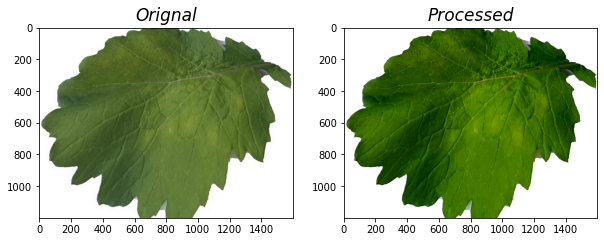

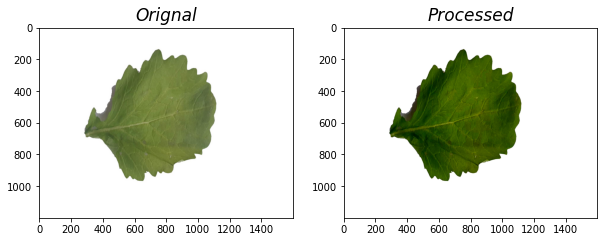

In [5]:
image_folder="Brassica Juncea (Indian Mustard)"  # The vegetable you want to display
number_of_images=2       # Number of images to display

def Preprocess():
    j=1
    for i in range(number_of_images):
    
        folder = os.path.join(test_folder,image_folder)
        a=random.choice(os.listdir(folder))

        image=Image.open(os.path.join(folder,a))
        image_duplicate=image.copy()
        plt.figure(figsize=(10,10))

        plt.subplot(number_of_images,2,j)
        plt.title(label='Orignal', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

        image1=ImageEnhance.Color(image_duplicate).enhance(1.35)
        image1=ImageEnhance.Contrast(image1).enhance(1.45)
        image1=ImageEnhance.Sharpness(image1).enhance(2.5)
        
        plt.subplot(number_of_images,2,j)
        plt.title(label='Processed', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image1)
        j+=1
        
Preprocess()

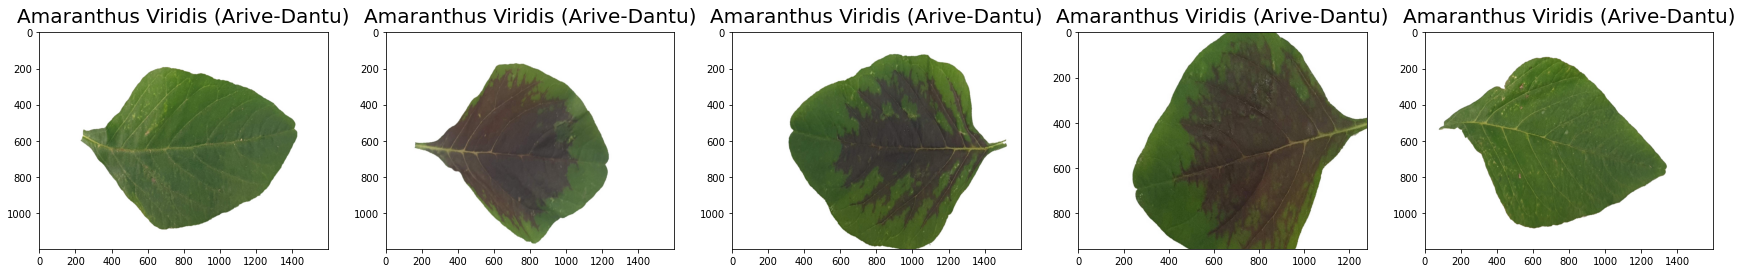

In [6]:
select_vegetable="Amaranthus Viridis (Arive-Dantu)"
rows,columns = 1,5

display_folder=os.path.join(train_folder,select_vegetable)
total_images=rows*columns
fig=plt.figure(1, figsize=(30, 10))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(train_folder,select_vegetable,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_vegetable, pad = 11, size=20)
    plt.imshow(img)
    
    if i==total_images-1:
        break

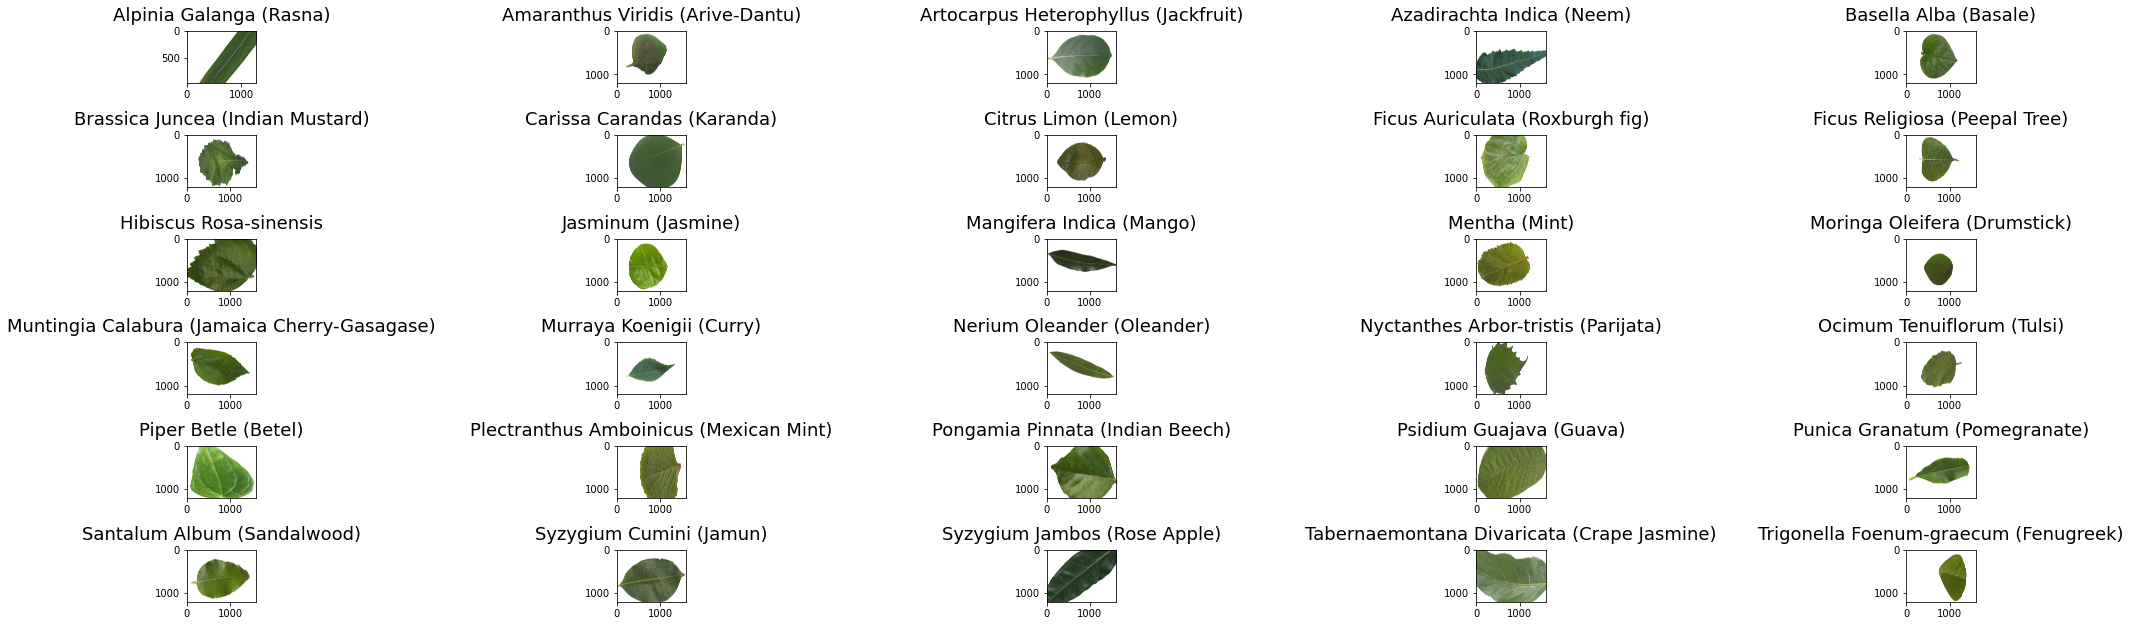

In [7]:
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))
                                     
fig=plt.figure(1, figsize=(30, 10))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(7, 5, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()

In [8]:
IMAGE_SIZE = [224, 224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(30, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

2022-05-19 10:58:16.425768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 10:58:16.579062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 10:58:16.580182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 10:58:16.581850: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

87924736/87910968 [==============================] - 1s 0us/step


In [9]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_folder, 
    target_size = (224, 224),
    batch_size = 64, 
    class_mode = 'categorical')

Found 3540 images belonging to 30 classes.
Found 780 images belonging to 30 classes.


In [10]:
class_map = training_set.class_indices
class_map

{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Artocarpus Heterophyllus (Jackfruit)': 2,
 'Azadirachta Indica (Neem)': 3,
 'Basella Alba (Basale)': 4,
 'Brassica Juncea (Indian Mustard)': 5,
 'Carissa Carandas (Karanda)': 6,
 'Citrus Limon (Lemon)': 7,
 'Ficus Auriculata (Roxburgh fig)': 8,
 'Ficus Religiosa (Peepal Tree)': 9,
 'Hibiscus Rosa-sinensis': 10,
 'Jasminum (Jasmine)': 11,
 'Mangifera Indica (Mango)': 12,
 'Mentha (Mint)': 13,
 'Moringa Oleifera (Drumstick)': 14,
 'Muntingia Calabura (Jamaica Cherry-Gasagase)': 15,
 'Murraya Koenigii (Curry)': 16,
 'Nerium Oleander (Oleander)': 17,
 'Nyctanthes Arbor-tristis (Parijata)': 18,
 'Ocimum Tenuiflorum (Tulsi)': 19,
 'Piper Betle (Betel)': 20,
 'Plectranthus Amboinicus (Mexican Mint)': 21,
 'Pongamia Pinnata (Indian Beech)': 22,
 'Psidium Guajava (Guava)': 23,
 'Punica Granatum (Pomegranate)': 24,
 'Santalum Album (Sandalwood)': 25,
 'Syzygium Cumini (Jamun)': 26,
 'Syzygium Jambos (Rose Apple)': 27,
 'Tab

In [11]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
    
)

2022-05-19 10:58:27.904138: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-05-19 10:58:36.256282: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


56/56 [==============================] - 183s 3s/step - loss: 1.9282 - accuracy: 0.4732 - val_loss: 0.8499 - val_accuracy: 0.7718
Epoch 2/30
56/56 [==============================] - 150s 3s/step - loss: 0.8037 - accuracy: 0.7686 - val_loss: 0.4984 - val_accuracy: 0.8705
Epoch 3/30
56/56 [==============================] - 150s 3s/step - loss: 0.5747 - accuracy: 0.8384 - val_loss: 0.3756 - val_accuracy: 0.8923
Epoch 4/30
56/56 [==============================] - 150s 3s/step - loss: 0.4355 - accuracy: 0.8785 - val_loss: 0.2994 - val_accuracy: 0.9128
Epoch 5/30
56/56 [==============================] - 151s 3s/step - loss: 0.3349 - accuracy: 0.9003 - val_loss: 0.2368 - val_accuracy: 0.9218
Epoch 6/30
56/56 [==============================] - 150s 3s/step - loss: 0.3132 - accuracy: 0.9076 - val_loss: 0.2498 - val_accuracy: 0.9308
Epoch 7/30
56/56 [==============================] - 151s 3s/step - loss: 0.2729 - accuracy: 0.9215 - val_loss: 0.2131 - val_accuracy: 0.9385
Epoch 8/30
56/56 [======

In [12]:
model.save('model_inceptionV3_epoch5.h5')

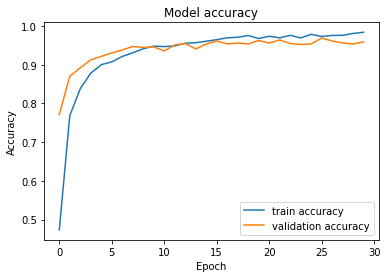

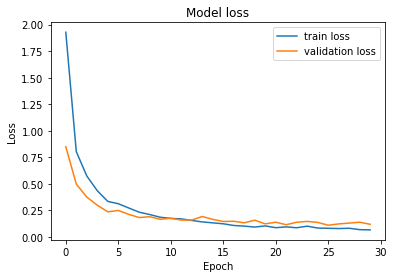

In [13]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(r)
plot_loss(r)

In [14]:
print("Total layers in the model : ",len(model.layers),"\n")

layers = [layer.output for layer in model.layers[0:]]
layer_names = []
for layer in model.layers[0:]: 
    layer_names.append(layer.name)
    
print("First layer : ", layer_names[0])
print("InceptionV3 layers : Layer 2 to Layer 311")
print("Our fine tuned layers : ", layer_names[311:314])
print("Final Layer : ", layer_names[314])


Total layers in the model :  315 

First layer :  input_1
InceptionV3 layers : Layer 2 to Layer 311
Our fine tuned layers :  ['global_average_pooling2d', 'dense', 'dropout']
Final Layer :  dense_1


In [15]:
# Using the test dataset
score = model.evaluate_generator(test_set)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11938214302062988
Test accuracy: 0.9589743614196777


In [16]:
K.clear_session()
path_to_model='./model_inceptionV3_epoch5.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [17]:
validation_data_dir = '../input/smpl-data/Segmented Medicinal Leaf Images/val'

validation_datagen = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 780 images belonging to 30 classes.
Test Accuracy: 0.964


In [18]:
category={
    0:'Alpinia Galanga (Rasna)',1:'Amaranthus Viridis (Arive-Dantu)',2:'Artocarpus Heterophyllus (Jackfruit)',3:'Azadirachta Indica (Neem)',4:'Basella Alba (Basale)',
5:'Brassica Juncea (Indian Mustard)',6:'Carissa Carandas (Karanda)',
7:'Citrus Limon (Lemon)',
8:'Ficus Auriculata (Roxburgh fig)',
9:'Ficus Religiosa (Peepal Tree)',
10:'Hibiscus Rosa-sinensis',
11:'Jasminum (Jasmine)',
12:'Mangifera Indica (Mango)',
13:'Mentha (Mint)',
14:'Moringa Oleifera (Drumstick)',
15:'Muntingia Calabura (Jamaica Cherry-Gasagase)',
16:'Murraya Koenigii (Curry)',
17:'Nerium Oleander (Oleander)',
18:'Nyctanthes Arbor-tristis (Parijata)',
19:'Ocimum Tenuiflorum (Tulsi)',
20:'Piper Betle (Betel)',
21:'Plectranthus Amboinicus (Mexican Mint)',
22:'Pongamia Pinnata (Indian Beech)',
23:'Psidium Guajava (Guava)',
24:'Punica Granatum (Pomegranate)',
25:'Santalum Album (Sandalwood)',
26:'Syzygium Cumini (Jamun)',
27:'Syzygium Jambos (Rose Apple)',
28:'Tabernaemontana Divaricata (Crape Jasmine)',
29:'Trigonella Foenum-graecum (Fenugreek)'
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

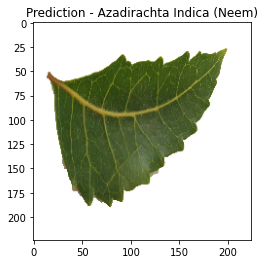

In [19]:
predict_image(os.path.join(validation_folder,'Azadirachta Indica (Neem)/AI_122.jpg'),model)

In [20]:
for i in os.listdir(validation_folder):
    predict_dir(os.path.join(validation_folder,i),model)

Accuracy for Murraya Koenigii (Curry): 1.00 (26/26)
Accuracy for Nyctanthes Arbor-tristis (Parijata): 1.00 (26/26)
Accuracy for Plectranthus Amboinicus (Mexican Mint): 0.96 (25/26)
Accuracy for Punica Granatum (Pomegranate): 0.92 (24/26)
Accuracy for Ficus Religiosa (Peepal Tree): 1.00 (26/26)
Accuracy for Muntingia Calabura (Jamaica Cherry-Gasagase): 0.96 (25/26)
Accuracy for Tabernaemontana Divaricata (Crape Jasmine): 0.88 (23/26)
Accuracy for Psidium Guajava (Guava): 1.00 (26/26)
Accuracy for Ocimum Tenuiflorum (Tulsi): 0.92 (24/26)
Accuracy for Moringa Oleifera (Drumstick): 0.92 (24/26)
Accuracy for Brassica Juncea (Indian Mustard): 1.00 (26/26)
Accuracy for Nerium Oleander (Oleander): 0.96 (25/26)
Accuracy for Carissa Carandas (Karanda): 1.00 (26/26)
Accuracy for Santalum Album (Sandalwood): 1.00 (26/26)
Accuracy for Artocarpus Heterophyllus (Jackfruit): 1.00 (26/26)
Accuracy for Mentha (Mint): 0.96 (25/26)
Accuracy for Citrus Limon (Lemon): 0.88 (23/26)
Accuracy for Alpinia Galan

In [21]:
def labels_confusion_matrix(validation_folder):
    
    folder_path=validation_folder
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):
        
        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]
        
        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(224,224))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 30
    cmap="turbo"
    cm_plot_labels = [i for i in range(30)]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

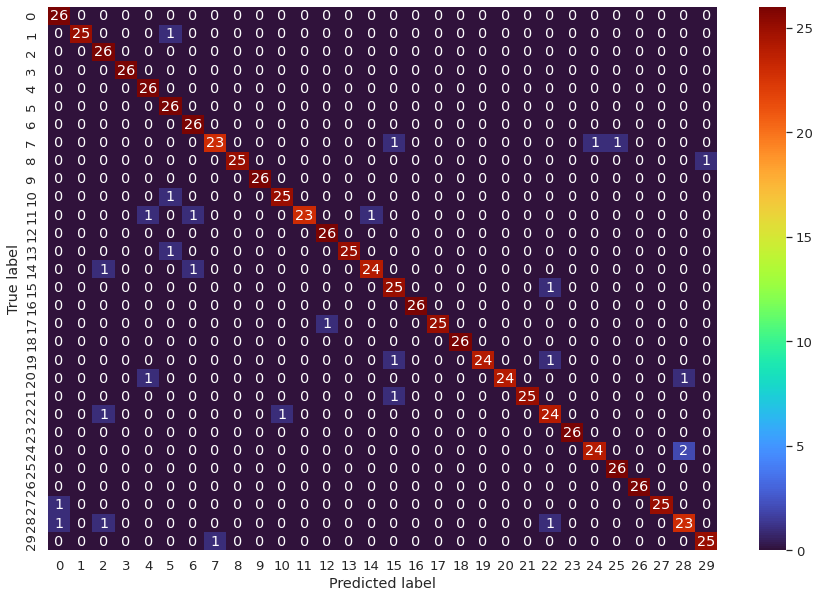

In [22]:
y_true,y_pred=labels_confusion_matrix(validation_folder)
print_confusion_matrix(y_true,y_pred)